In [2]:
from src.io_utils import load_points
from src.kmeans import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [3]:
points = load_points("data/sample.csv")
points = np.array(points)

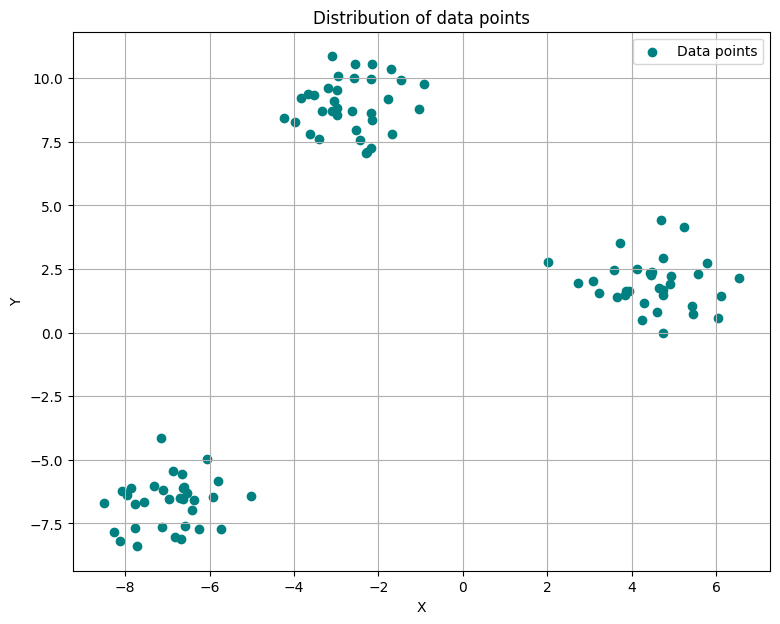

In [34]:
plt.figure(figsize=(9,7))
plt.scatter(points[:,0], points[:,1], label  = "Data points", c = "teal")
plt.title("Distribution of data points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)

In [5]:
result = KMeans.elbow_method(points,max_k = 8)

Testing K from 1 to 8:
  K=1: quality=6474.4445
  K=2: quality=1851.9999
  K=3: quality=171.9110
  K=4: quality=146.4144
  K=5: quality=127.2479
  K=6: quality=114.9238
  K=7: quality=93.2441
  K=8: quality=81.4685


In [7]:
type(result)

dict

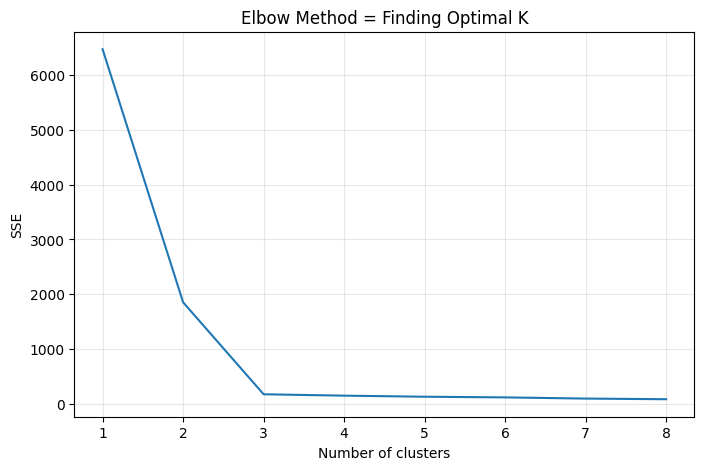

In [12]:
plt.figure(figsize=(8,5))
plt.plot(result.keys(), result.values())
plt.title("Elbow Method = Finding Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.grid(True, alpha = 0.3)
plt.show()


In [14]:
model = KMeans(K = 3)
print(model)

KMeans(K=3, max_iters=100) - Not fitted


In [16]:
model.fit(points)
print(model)

KMeans(K=3, max_iters=100)
  Steps taken: 2
  Quality (SSE): 171.9110
  Cluster sizes: [34, 33, 33]


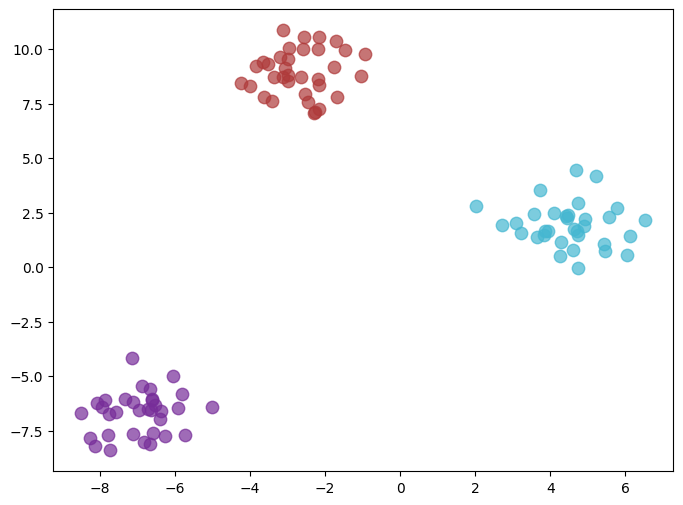

In [17]:
colors = ["#AF3A3A","#772D99",'#45B7D1']
assignments = np.array(model.assignments)

plt.figure(figsize=(8,6))
for k in range(3):
    cluster_points = points[assignments == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1],
    c = colors[k], label = f"Cluster {k}" ,s= 80, alpha = 0.7)

In [19]:
centroids = np.array(model.centroids)
print(centroids)

[[-2.66780392  8.93576069]
 [-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]]


/tmp/ipykernel_12082/2480631824.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


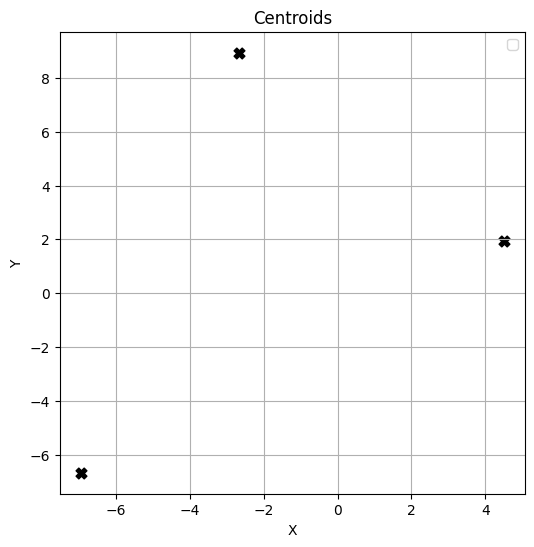

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(centroids[:,0], centroids[:,1], marker="X",c = "black", s = 60)
plt.title("Centroids")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()

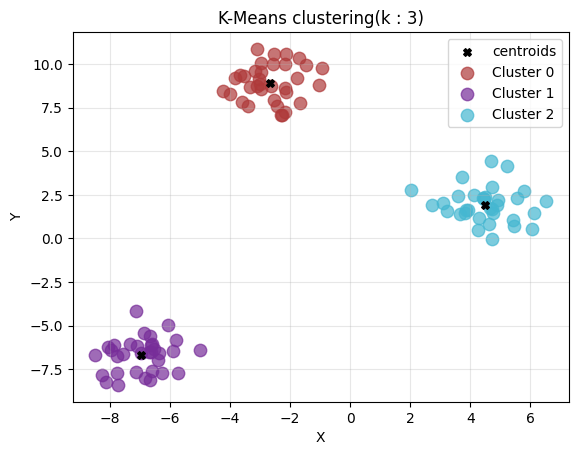

In [23]:
colors = ["#AF3A3A","#772D99",'#45B7D1']
assignments = np.array(model.assignments)
plt.scatter(centroids[:,0], centroids[:,1],c = "black",marker = "X", s = 30, label= 'centroids', zorder = 5)
# plt.figure(figsize=(8,6))
for k in range(3):
    cluster_points = points[assignments == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1],
    c = colors[k], label = f"Cluster {k}" ,s= 80, alpha = 0.7)
plt.title(f"K-Means clustering(k : {model.K})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True,alpha= 0.3)
plt.show()

In [25]:
model_random = KMeans(K=3)
model_random.fit(points,n_init=10,init = "random")
print(model_random)



KMeans(K=3, max_iters=100)
  Steps taken: 2
  Quality (SSE): 171.9110
  Cluster sizes: [34, 33, 33]


In [26]:
model_pp = KMeans(K = 3)
model_pp.fit(points,n_init = 10, init = "kmeans++")
print(model_pp)

KMeans(K=3, max_iters=100)
  Steps taken: 2
  Quality (SSE): 171.9110
  Cluster sizes: [33, 33, 34]


In [27]:
print(f"Random SSE: {model_random.sse:.2f}")
print(f"KMeans++ SSE: {model_pp.sse:.2f}")

Random SSE: 171.91
KMeans++ SSE: 171.91
